In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [12.5, 10]

# SIR-modellen
Modellen arbejder med at dele befolkningen ind i tre grupper: susceptible (S) altså udsatte eller ikke endnu smittede, infected (I) og recovered (R), dvs. enten kurerede og immune eller døde over tid _t_.

Derudover er der to meta-parametre som ligner meget dem vi kiggede på tidligere i dag, nemlig frekvens af kontakt imellem individer $\beta$, og frekvens af overstået sygdomsforløb $\gamma$. Disse kan også udtrykkes som typisk tid imellem kontakt $\beta^{-1}$ og typisk længde af sygdomsforløb $\gamma^{-1}$, som er lidt mere håndgribeligt.

Modellen udtrykkes i differentialerne for S, I og R som følger:

\begin{align}
\frac{dS}{dt} &= - \frac{\beta I S}{N} \\
\frac{dI}{dt} &= \frac{\beta I S}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I \\
\end{align}

Du kan læse mere om SIR-modellen (og alle de afledte modeller) her: https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology

# Implementering
Jeg har implementeret modellen som en klasse, som tager antal smittede til at starte med, meta-parametre, og befolkningsstørrelse som input. Ved kald til dens funktion ```run()``` udregner den så dag for dag, og standser når der er mindre end én smittet.

In [3]:
class SIRModel:
    """Calculates the series of S (susceptible), I (infected) and R (recovered)
    from the number of initially infected, infection rate (beta), population size (N)
    and recovery rate (gamma)"""
    
    # Initialize values
    def __init__(self, I_init, beta, N, gamma):
        self.beta  = beta
        self.N     = N
        self.gamma = gamma
        
        self.S = N - I_init
        self.I = I_init
        self.R = 0

        self.S_list = []
        self.I_list = []
        self.R_list = []
        
        self.has_run = False
        self.run_end = None
    
    def run(self, max_days = 1000):
        if self.has_run:
            print('The model has already been run.')
            return
        for day in range(max_days):
            # Save current numbers
            self.S_list.append(self.S)
            self.I_list.append(self.I)
            self.R_list.append(self.R)

            # Calculate differentials
            d_S = - ((self.beta * self.I * self.S)/self.N)
            d_I = ((self.beta * self.I * self.S)/self.N) - self.gamma * self.I
            d_R = self.gamma * self.I

            # Add differentials to current numbers
            self.S += d_S
            self.I += d_I
            self.R += d_R

            # Check if the epidemic is done
            if self.I < 1:
                self.run_end = day + 1
                break
        self.run_end = day + 1
        self.has_run = True
      

    def __repr__(self):
        retval = "-"*25 + ' Model info ' + '-'*25 + '\n'
        retval += "β = %.2f\nγ = %.2f\nPopulation = %d\n" % (self.beta, self.gamma, self.N)
        retval += "Basic reproduction number = %.2f\n" % (self.beta/self.gamma)
        if self.has_run:
            retval += ("Epidemic was not done at the end of the simulation (%d days)\n" if (self.I > 1) else "Epidemic ended after %d days\n") % self.run_end
            retval += "Total number of infected: %d (%.2f%% of the population)\n" % (self.R, (int(self.R)/self.N)*100)
            retval += "Maximum number of infected at one time: %d (at day %d)\n" % (int(max(self.I_list)), self.I_list.index(max(self.I_list)))
        else:
            retval += "Model has not been run yet."
        retval += '-'*62 + '\n'
        return(retval)
    
    
    def plot_bars(self):
        width = 1
        
        X = list(range(self.run_end))

        n_S = np.array(self.S_list)
        n_I = np.array(self.I_list)
        #n_R = np.array(self.R)

        plt.bar(X, self.I_list, width, label='Infected', color='red')
        plt.bar(X, self.S_list, width, label='Susceptible', bottom=self.I_list, color = 'green')
        plt.bar(X, self.R_list, width, label='Recovered or dead', bottom=n_S + n_I, color='blue')

        plt.ylabel('Individuals')
        plt.xlabel('Days after first infected')
        plt.title('Distribution in population\nβ = %.2f\nγ = %.2f\nPopulation = %d\n' % (self.beta, self.gamma, self.N))
        plt.legend()

        plt.show()
    
    
    def plot(self, only_infected=False, linewidth = 3):
        X = list(range(self.run_end))
        
        plt.plot(X, self.I_list, label='Infected (β = %.2f, γ = %.2f, N = %d)' % (self.beta, self.gamma, self.N), lw=linewidth)
        if not only_infected:
            plt.plot(X, self.S_list, label='Susceptible (β = %.2f, γ = %.2f, N = %d)' % (self.beta, self.gamma, self.N), lw=linewidth)
            plt.plot(X, self.R_list, label='Removed (β = %.2f, γ = %.2f, N = %d)' % (self.beta, self.gamma, self.N), lw=linewidth)

        plt.ylabel('Individuals')
        plt.xlabel('Days after first infected')
        plt.legend()
        
    

# Brug
Hver model initialiseres med ```SIRModel(I_init, beta, N, gamma)``` og køres med ```run([max_days = 1000])```.

Herefter kan modellens informationer printes ved at passere modellen som argument til Pythons ```print()```

In [4]:
first = SIRModel(5, 0.25, 100000, 1./10)
first.run()
print(first)

second = SIRModel(5, 0.15, 100000, 1./10)
second.run()
print(second)

------------------------- Model info -------------------------
β = 0.25
γ = 0.10
Population = 100000
Basic reproduction number = 2.50
Epidemic ended after 215 days
Total number of infected: 89910 (89.91% of the population)
Maximum number of infected at one time: 24104 (at day 73)
--------------------------------------------------------------

------------------------- Model info -------------------------
β = 0.15
γ = 0.10
Population = 100000
Basic reproduction number = 1.50
Epidemic ended after 437 days
Total number of infected: 58595 (58.59% of the population)
Maximum number of infected at one time: 6393 (at day 178)
--------------------------------------------------------------



# Visualisering
Modellerne har selv funktionalitet til at visualiseres på tre måder:
- ```model.plot()```, som plotter S, I og R over tid
- ```model.plot(only_infected=True)```, som kun plotter I (brugbar til sammenligning af modeller
- ```model.plot_bars()```, som plotter fordelingen imellem S, I og R over tid.

De tre er illustreret neden for:

## plot()

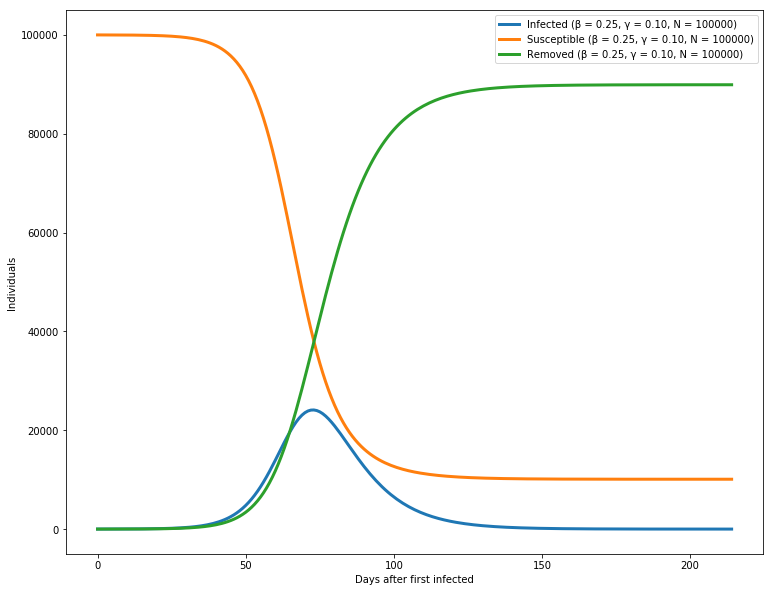

In [5]:
first.plot()

## plot(only_infected=True)

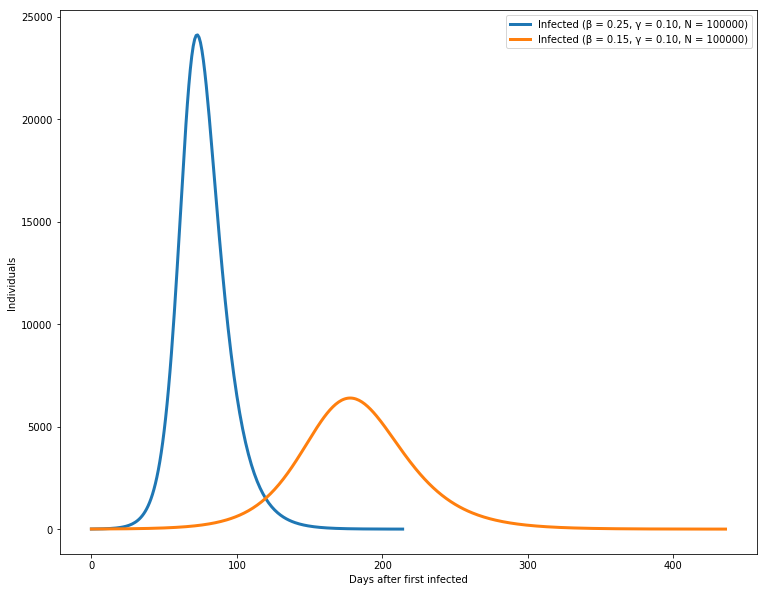

In [6]:
first.plot(only_infected=True)
second.plot(only_infected=True)

## plot_bars()

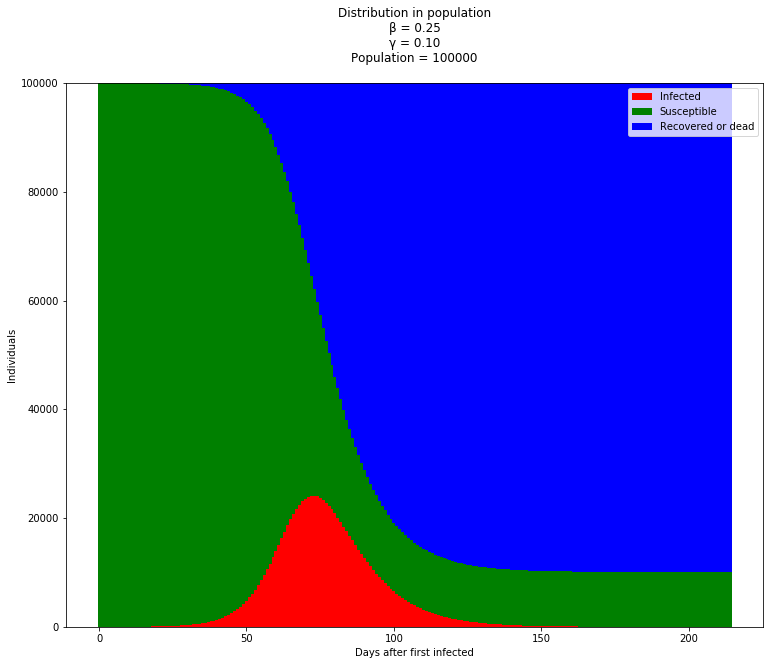

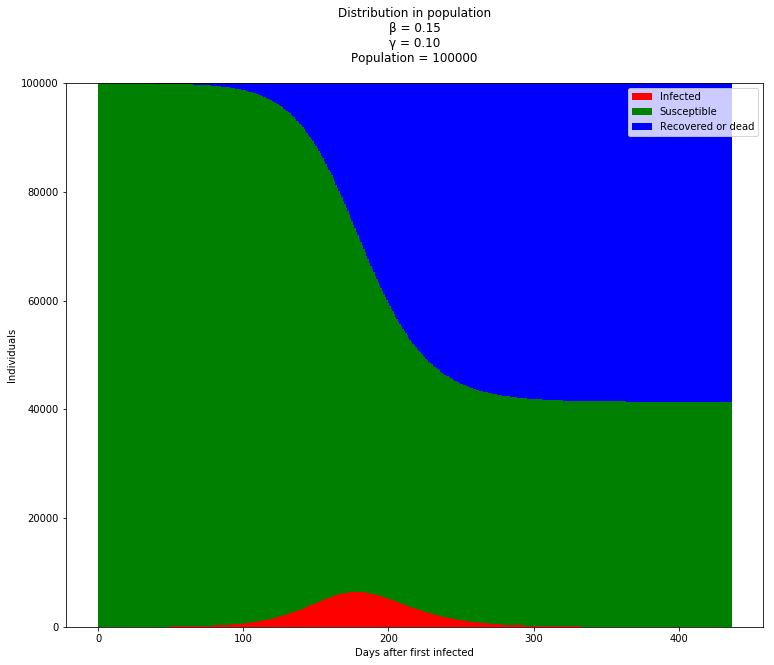

In [7]:
first.plot_bars()
second.plot_bars()